In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,learning_curve

pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [40]:
df = pd.read_csv('../data/data_clear.csv')

In [41]:
df.columns

Index(['City', 'State', 'BankState', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'GrAppv',
       'is_default', 'have_franchise', 'sector', 'in_recession'],
      dtype='object')

In [42]:
X = df.drop(['City', 'CreateJob','RetainedJob', 'RevLineCr',"is_default"], axis=1)
y = df['is_default']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True,stratify=y, random_state=42)

In [43]:
numeric_features = ["Term","NoEmp","GrAppv", 'have_franchise', 'in_recession', "LowDoc"]
categorial_features = ["State","BankState","NewExist","UrbanRural","sector"]

In [44]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [45]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorial_features)
    ]
   , remainder="passthrough" 
)

In [46]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
pipe_dummy = Pipeline([
     ('preprocessor', preprocessor),
     ('dummy', dummy)
])

In [47]:
pipe_dummy.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['State', 'BankState',
                                                   'NewExist', 'UrbanRural',
                                                   'sector'])])),
                ('dummy', DummyClassifier())])

In [48]:
print(pipe_dummy.score(X_train,y_train))
print(pipe_dummy.score(X_test,y_test))

0.8257205794645412
0.8257262823422605


In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

tree = RandomForestClassifier(n_estimators=151,min_samples_split=100,max_features=25,random_state=0,oob_score=True,class_weight={0: 1, 1: 2.25},verbose=2,n_jobs=-2,max_samples=0.9)

In [128]:
pipe = Pipeline([
     ('preprocessor', preprocessor),
     ('decisiontree', tree)
])

In [129]:
pipe.fit(X_train,y_train)

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.


building tree 1 of 151
building tree 2 of 151
building tree 3 of 151
building tree 4 of 151
building tree 5 of 151
building tree 6 of 151
building tree 7 of 151
building tree 8 of 151
building tree 9 of 151
building tree 10 of 151
building tree 11 of 151
building tree 12 of 151
building tree 13 of 151
building tree 14 of 151
building tree 15 of 151
building tree 16 of 151
building tree 17 of 151
building tree 18 of 151
building tree 19 of 151
building tree 20 of 151
building tree 21 of 151
building tree 22 of 151
building tree 23 of 151
building tree 24 of 151
building tree 25 of 151
building tree 26 of 151
building tree 27 of 151
building tree 28 of 151
building tree 29 of 151
building tree 30 of 151
building tree 31 of 151
building tree 32 of 151
building tree 33 of 151
building tree 34 of 151


[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:  5.1min


building tree 35 of 151
building tree 36 of 151
building tree 37 of 151
building tree 38 of 151
building tree 39 of 151
building tree 40 of 151
building tree 41 of 151
building tree 42 of 151
building tree 43 of 151
building tree 44 of 151
building tree 45 of 151
building tree 46 of 151
building tree 47 of 151
building tree 48 of 151
building tree 49 of 151
building tree 50 of 151
building tree 51 of 151
building tree 52 of 151
building tree 53 of 151
building tree 54 of 151
building tree 55 of 151
building tree 56 of 151
building tree 57 of 151
building tree 58 of 151
building tree 59 of 151
building tree 60 of 151
building tree 61 of 151
building tree 62 of 151
building tree 63 of 151
building tree 64 of 151
building tree 65 of 151
building tree 66 of 151
building tree 67 of 151
building tree 68 of 151
building tree 69 of 151
building tree 70 of 151
building tree 71 of 151
building tree 72 of 151
building tree 73 of 151
building tree 74 of 151
building tree 75 of 151
building tree 76

[Parallel(n_jobs=-2)]: Done 151 out of 151 | elapsed: 25.2min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['State', 'BankState',
                                                   'LowDoc', 'NewExist',
                                                   'UrbanRural', 'sector',
                                                   'have_franchise',
                                                   'in_recession'])])),
                ('decisiontree',
                 RandomForestClassifier(class_weight={0: 1, 1: 2.25},
                                        max_features=25, max_samples=0.9,
                                        min_samples_split=100, n_estimators=151,
                                        n_jobs=-2, oob_score=True,
                                        random_state=0, verbose=2))])

In [130]:
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    1.4s
[Parallel(n_jobs=7)]: Done 151 out of 151 | elapsed:    7.4s finished


0.9438553885688274


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    0.2s


0.9367907399001362


[Parallel(n_jobs=7)]: Done 151 out of 151 | elapsed:    0.8s finished


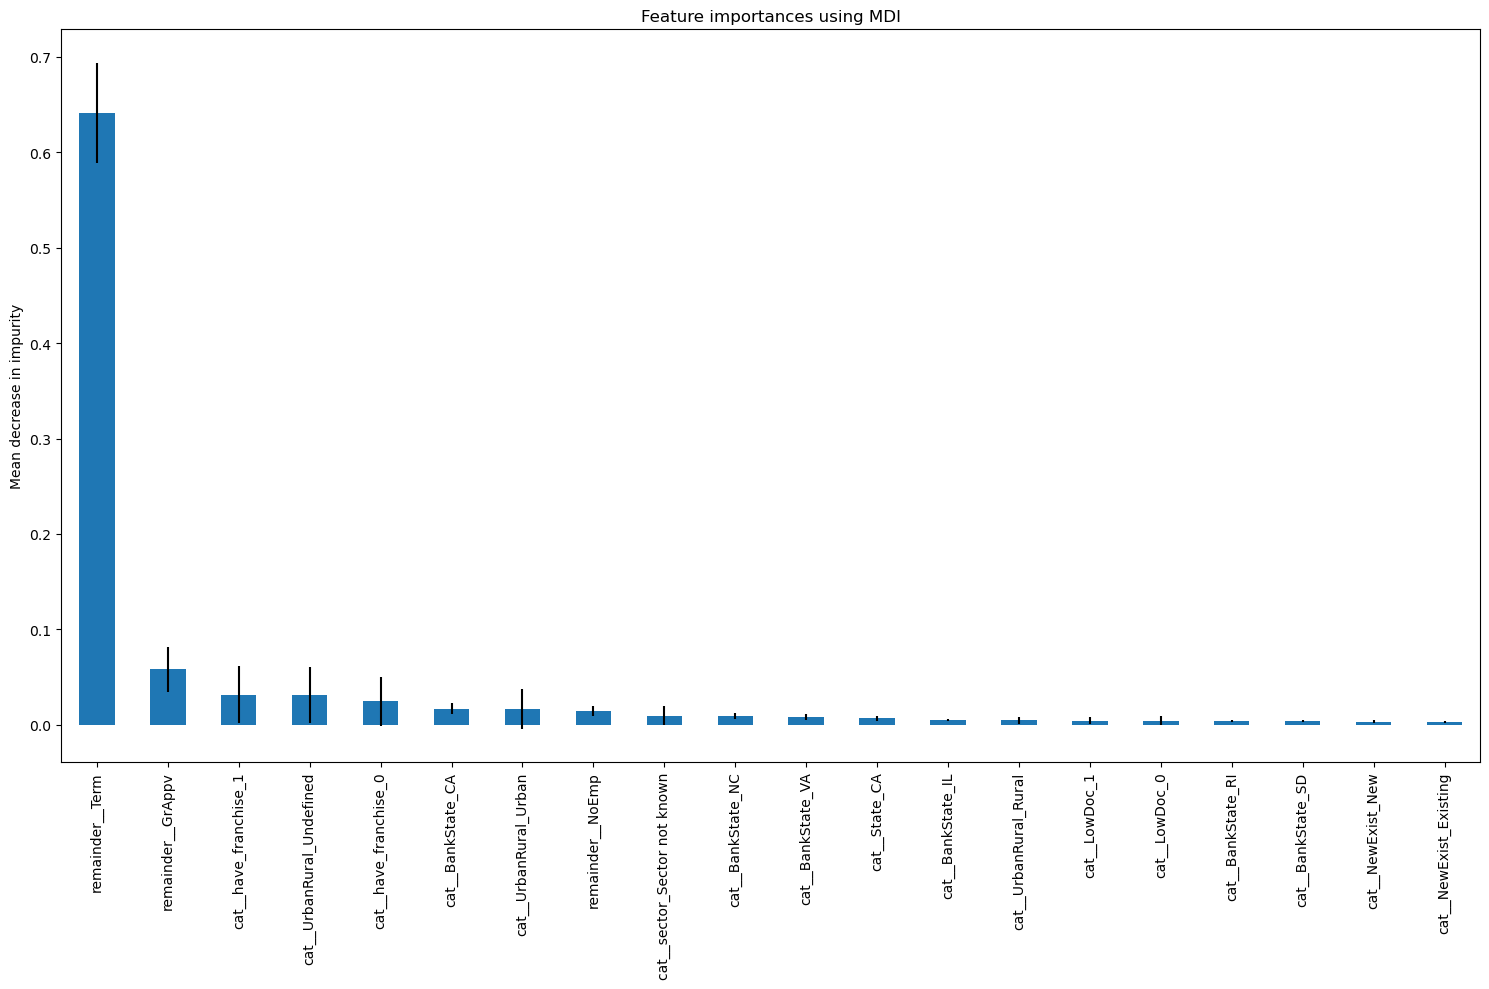

In [131]:
importances = pipe[-1].feature_importances_
std = np.std([tree.feature_importances_ for tree in pipe[-1].estimators_], axis=0)

forest_importances = pd.DataFrame({"feature_importances":importances,"std":std},index=pipe[0].get_feature_names_out())
forest_importances.sort_values(by="feature_importances",ascending=False,inplace=True)
forest_importances = forest_importances.head(20)

fig, ax = plt.subplots(figsize=(15,10))
forest_importances["feature_importances"].plot.bar(yerr=forest_importances["std"], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [132]:
pipe[-1].oob_score_

0.9349331779890225

In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_train,y_pred=pipe.predict(X_train)))

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    1.2s
[Parallel(n_jobs=7)]: Done 151 out of 151 | elapsed:    6.4s finished


              precision    recall  f1-score   support

           0       0.97      0.96      0.97    654860
           1       0.83      0.86      0.84    138217

    accuracy                           0.94    793077
   macro avg       0.90      0.91      0.90    793077
weighted avg       0.94      0.94      0.94    793077



In [134]:
print(classification_report(y_true=y_test,y_pred=pipe.predict(X_test)))

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.97      0.96      0.96     72763
           1       0.81      0.84      0.82     15357

    accuracy                           0.94     88120
   macro avg       0.89      0.90      0.89     88120
weighted avg       0.94      0.94      0.94     88120



[Parallel(n_jobs=7)]: Done 151 out of 151 | elapsed:    0.7s finished


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    1.2s
[Parallel(n_jobs=7)]: Done 151 out of 151 | elapsed:    6.5s finished


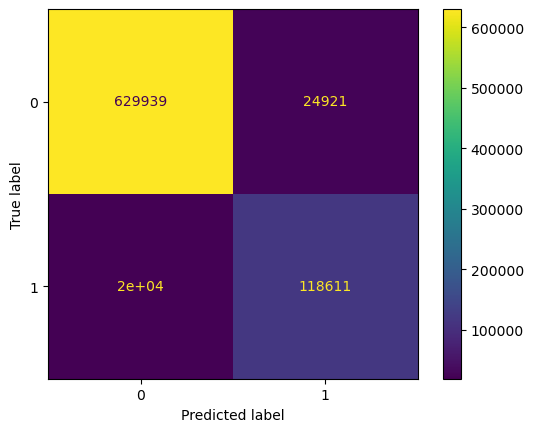

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_train,y_pred=pipe.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipe[-1].classes_)
disp.plot()

plt.show()


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done 151 out of 151 | elapsed:    0.7s finished


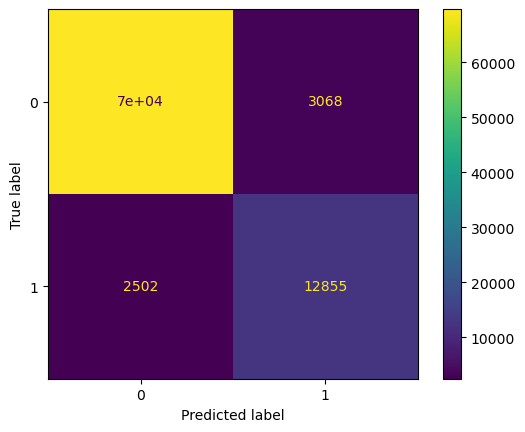

In [136]:
cm = confusion_matrix(y_true=y_test,y_pred=pipe.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipe[-1].classes_)
disp.plot()

plt.show()


In [137]:
# train_sizes, train_scores, test_scores = learning_curve(
#     pipe, X_train, y_train, cv=2, scoring='accuracy',train_sizes=np.linspace(0.1,1,10))

# train_scores_mean = train_scores.mean(axis=1)
# test_scores_mean = test_scores.mean(axis=1)

# plt.plot(train_sizes, train_scores_mean, 'o-', label='Scores d\'entraînement')
# plt.plot(train_sizes, test_scores_mean, 'o-', label='Scores de test')
# plt.legend()
# plt.show()

# LogisticRegression

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorial_features),
        ("num",StandardScaler(),numeric_features)
        ]
)

logisticreg=Pipeline([
     ('preprocessor', preprocessor),
     ('logisticregression', LogisticRegression(random_state=42,max_iter=10000))
     ]
)


In [22]:
logisticreg.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['State', 'BankState',
                                                   'LowDoc', 'NewExist',
                                                   'UrbanRural', 'sector',
                                                   'have_franchise',
                                                   'in_recession']),
                                                 ('num', StandardScaler(),
                                                  ['Term', 'NoEmp',
                                                   'GrAppv'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [23]:
# from sklearn.inspection import permutation_importance


# result = permutation_importance(logisticreg, X_train, y_train, n_repeats=10,
#                                 random_state=0)
# result.importances_mean

# result.importances_std

In [24]:
col_name = logisticreg[0].get_feature_names_out()

coef = pd.DataFrame(data=logisticreg[-1].coef_.reshape(-1,1), columns=['coefs'], index=col_name)

In [ ]:
coef = coef.sort_values(by="coefs",ascending=False)
coef.head(10)

In [26]:
print(logisticreg.score(X_train,y_train))
print(logisticreg.score(X_test,y_test))

0.8637433691810505
0.8646845211075805


In [49]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=201, max_depth=15, objective='binary:logistic',random_state=42,n_jobs=-2)
pipe_xgboost = Pipeline([
     ('preprocessor', preprocessor),
     ('xgboost', bst)
])

In [50]:
# from sklearn.model_selection import GridSearchCV

# parameters = {"xgboost__learning_rate":[0.125,0.15,0.175],"xgboost__scale_pos_weight":[1.25,1.5,1.75,2]}
# grid_src = GridSearchCV(estimator=pipe_xgboost, param_grid=parameters,scoring='f1_macro',cv=5,verbose=2)
# grid_src.fit(X_train, y_train)

# pipe_xgboost.set_params(**grid_src.best_params_)
# print(grid_src.best_params_)
best={'xgboost__learning_rate': 0.125, 'xgboost__scale_pos_weight': 1.5}
pipe_xgboost.set_params(**best)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['State', 'BankState',
                                                   'NewExist', 'UrbanRural',
                                                   'sector'])])),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.125, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=15,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=201, n_jobs=-2,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, ...))])

In [51]:
pipe_xgboost.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['State', 'BankState',
                                                   'NewExist', 'UrbanRural',
                                                   'sector'])])),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.125, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=15,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=201, n_jobs=-2,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, ...))])

In [ ]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(pipe_xgboost,X_train,y_train,cv=5)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_train,y_pred=pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    654860
           1       0.84      0.85      0.84    138217

    accuracy                           0.95    793077
   macro avg       0.90      0.91      0.91    793077
weighted avg       0.95      0.95      0.95    793077



In [ ]:
print(classification_report(y_true=y_train,y_pred=pipe_xgboost.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    654860
           1       0.92      0.94      0.93    138217

    accuracy                           0.98    793077
   macro avg       0.95      0.96      0.96    793077
weighted avg       0.98      0.98      0.98    793077



In [ ]:
print(classification_report(y_true=y_test,y_pred=pipe_xgboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     72763
           1       0.84      0.86      0.85     15357

    accuracy                           0.95     88120
   macro avg       0.90      0.91      0.91     88120
weighted avg       0.95      0.95      0.95     88120



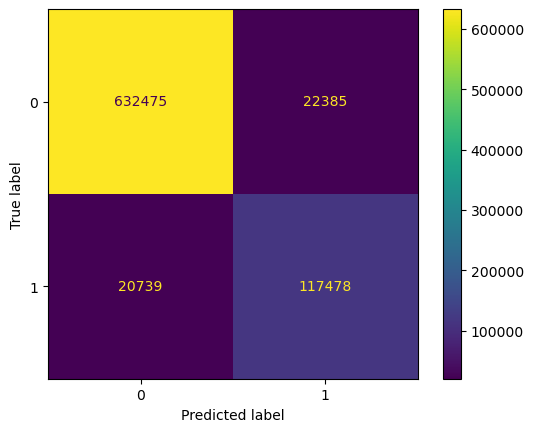

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_train,y_pred=pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipe_xgboost[-1].classes_)
disp.plot()

plt.show()

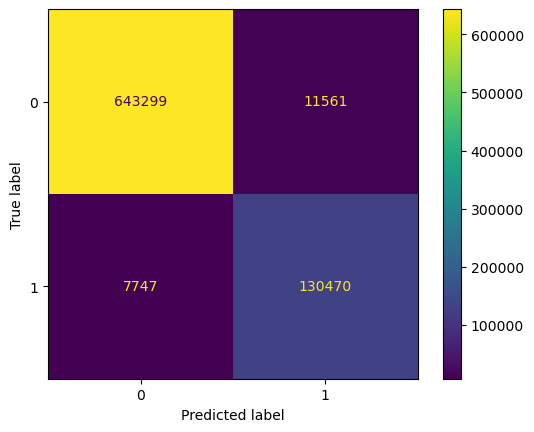

In [ ]:
cm = confusion_matrix(y_true=y_train,y_pred=pipe_xgboost.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipe_xgboost[-1].classes_)
disp.plot()

plt.show()

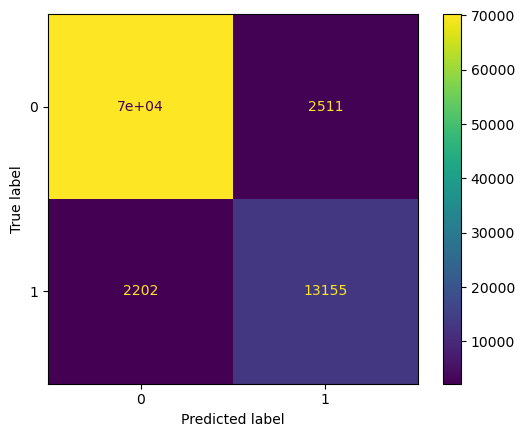

In [ ]:
cm = confusion_matrix(y_true=y_test,y_pred=pipe_xgboost.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipe_xgboost[-1].classes_)
disp.plot()

plt.show()

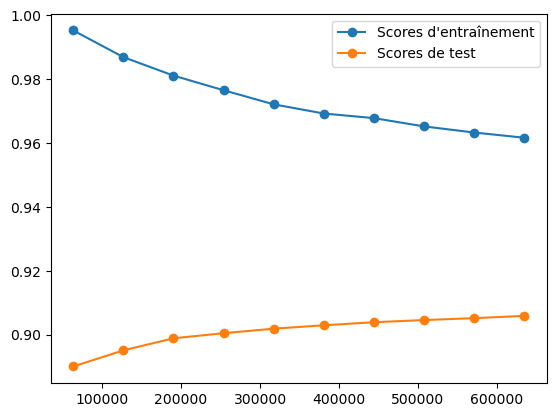

In [74]:
train_sizes, train_scores, test_scores = learning_curve(
    pipe_xgboost, X_train, y_train, cv=5, scoring='f1_macro',train_sizes=np.linspace(0.1,1,10))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Scores d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Scores de test')
plt.legend()
plt.show()

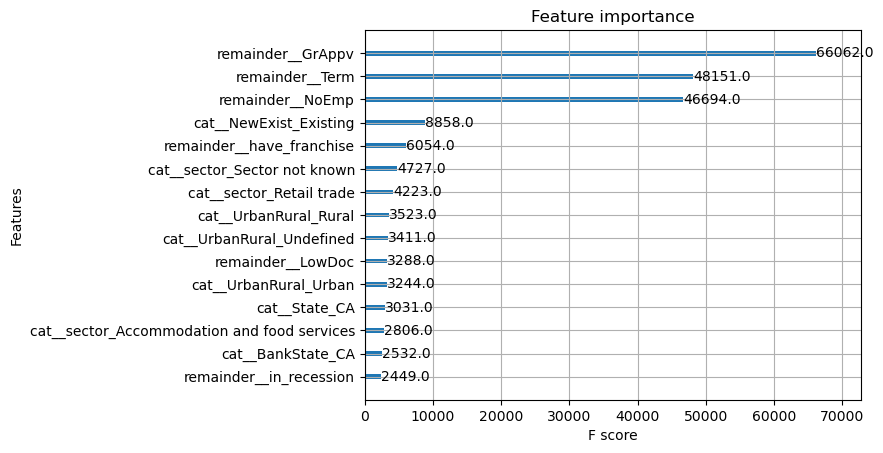

In [73]:
from xgboost import plot_importance

pipe_xgboost[-1].get_booster().feature_names = list(pipe_xgboost[0].get_feature_names_out())
plot_importance(pipe_xgboost[-1],max_num_features=15)
plt.show()

In [77]:
import pickle
pickle_out = open("../Steven/model_XGBoost.pkl", "wb") 
pickle.dump(pipe_xgboost, pickle_out) 
pickle_out.close()